In [132]:
# Passo 1 - Importe os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis

In [133]:
# 2. Carregar e exibir os dados
df = pd.read_csv('CO2Emission.csv')
df.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [134]:
# 3. Compreender e descrever os dados
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ENGINESIZE                968 non-null    float64
 1   CYLINDERS                 1067 non-null   int64  
 2   FUELTYPE                  1067 non-null   object 
 3   FUELCONSUMPTION_CITY      1067 non-null   float64
 4   FUELCONSUMPTION_HWY       1067 non-null   float64
 5   FUELCONSUMPTION_COMB      1067 non-null   float64
 6   FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 7   CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 66.8+ KB


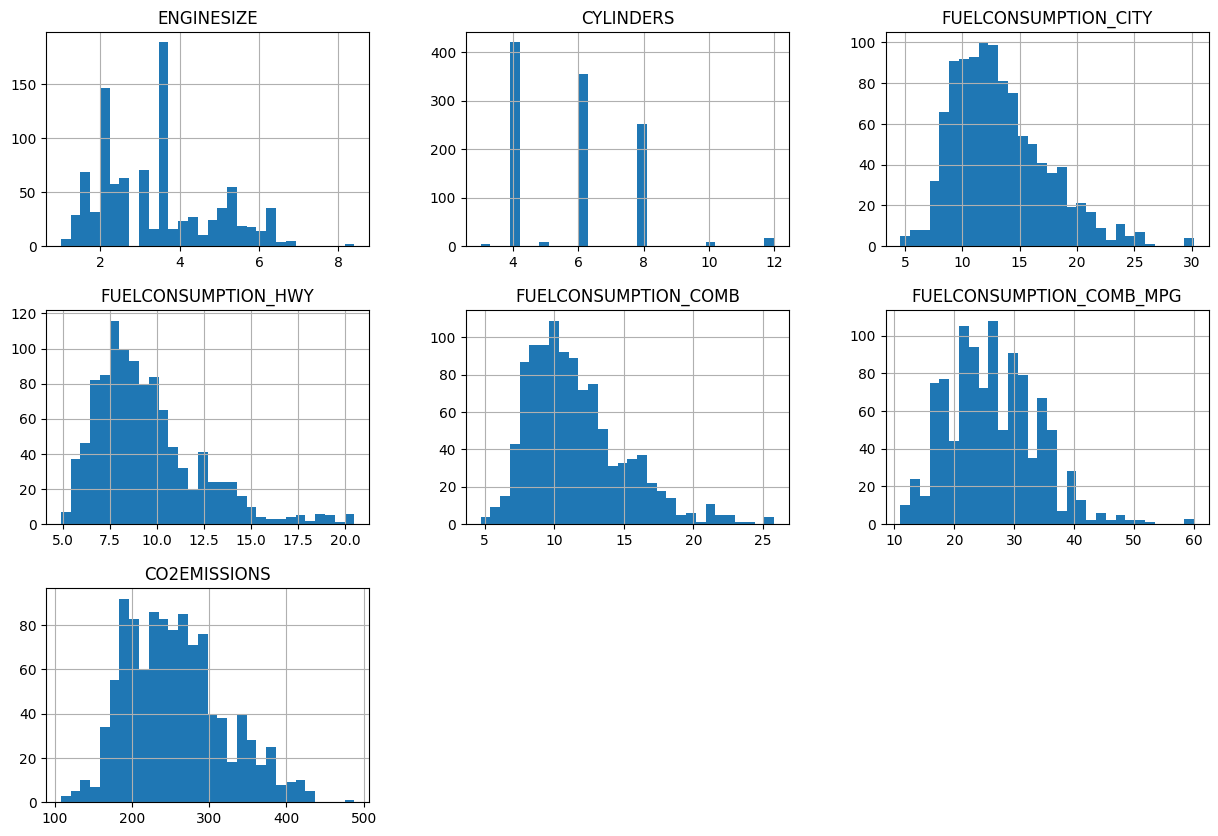

In [135]:
df.hist(bins=30, figsize=(15,10))
plt.show()

In [136]:
# Skewness e Kurtosis
for col in df.select_dtypes(include=np.number).columns:
    print(f'{col} - Skew: {skew(df[col])}, Kurtosis: {kurtosis(df[col])}')

ENGINESIZE - Skew: nan, Kurtosis: nan
CYLINDERS - Skew: 0.7946351967974735, Kurtosis: 0.47094226374474335
FUELCONSUMPTION_CITY - Skew: 0.8993623042454025, Kurtosis: 0.9413416946375341
FUELCONSUMPTION_HWY - Skew: 1.2620814260248627, Kurtosis: 1.8749491491500025
FUELCONSUMPTION_COMB - Skew: 1.031140279504118, Kurtosis: 1.2186566261048775
FUELCONSUMPTION_COMB_MPG - Skew: 0.5845855433540207, Kurtosis: 0.738206119097109
CO2EMISSIONS - Skew: 0.5187840084529483, Kurtosis: -0.11465840677682548


In [137]:
# Passo 4 - Divida os dados em treinamento e teste, utilizando o parâmetro stratify
# Para stratify, vou usar a coluna 'FUELTYPE', que é categórica
train, test = train_test_split(df, test_size=0.2, stratify=df['FUELTYPE'], random_state=42)

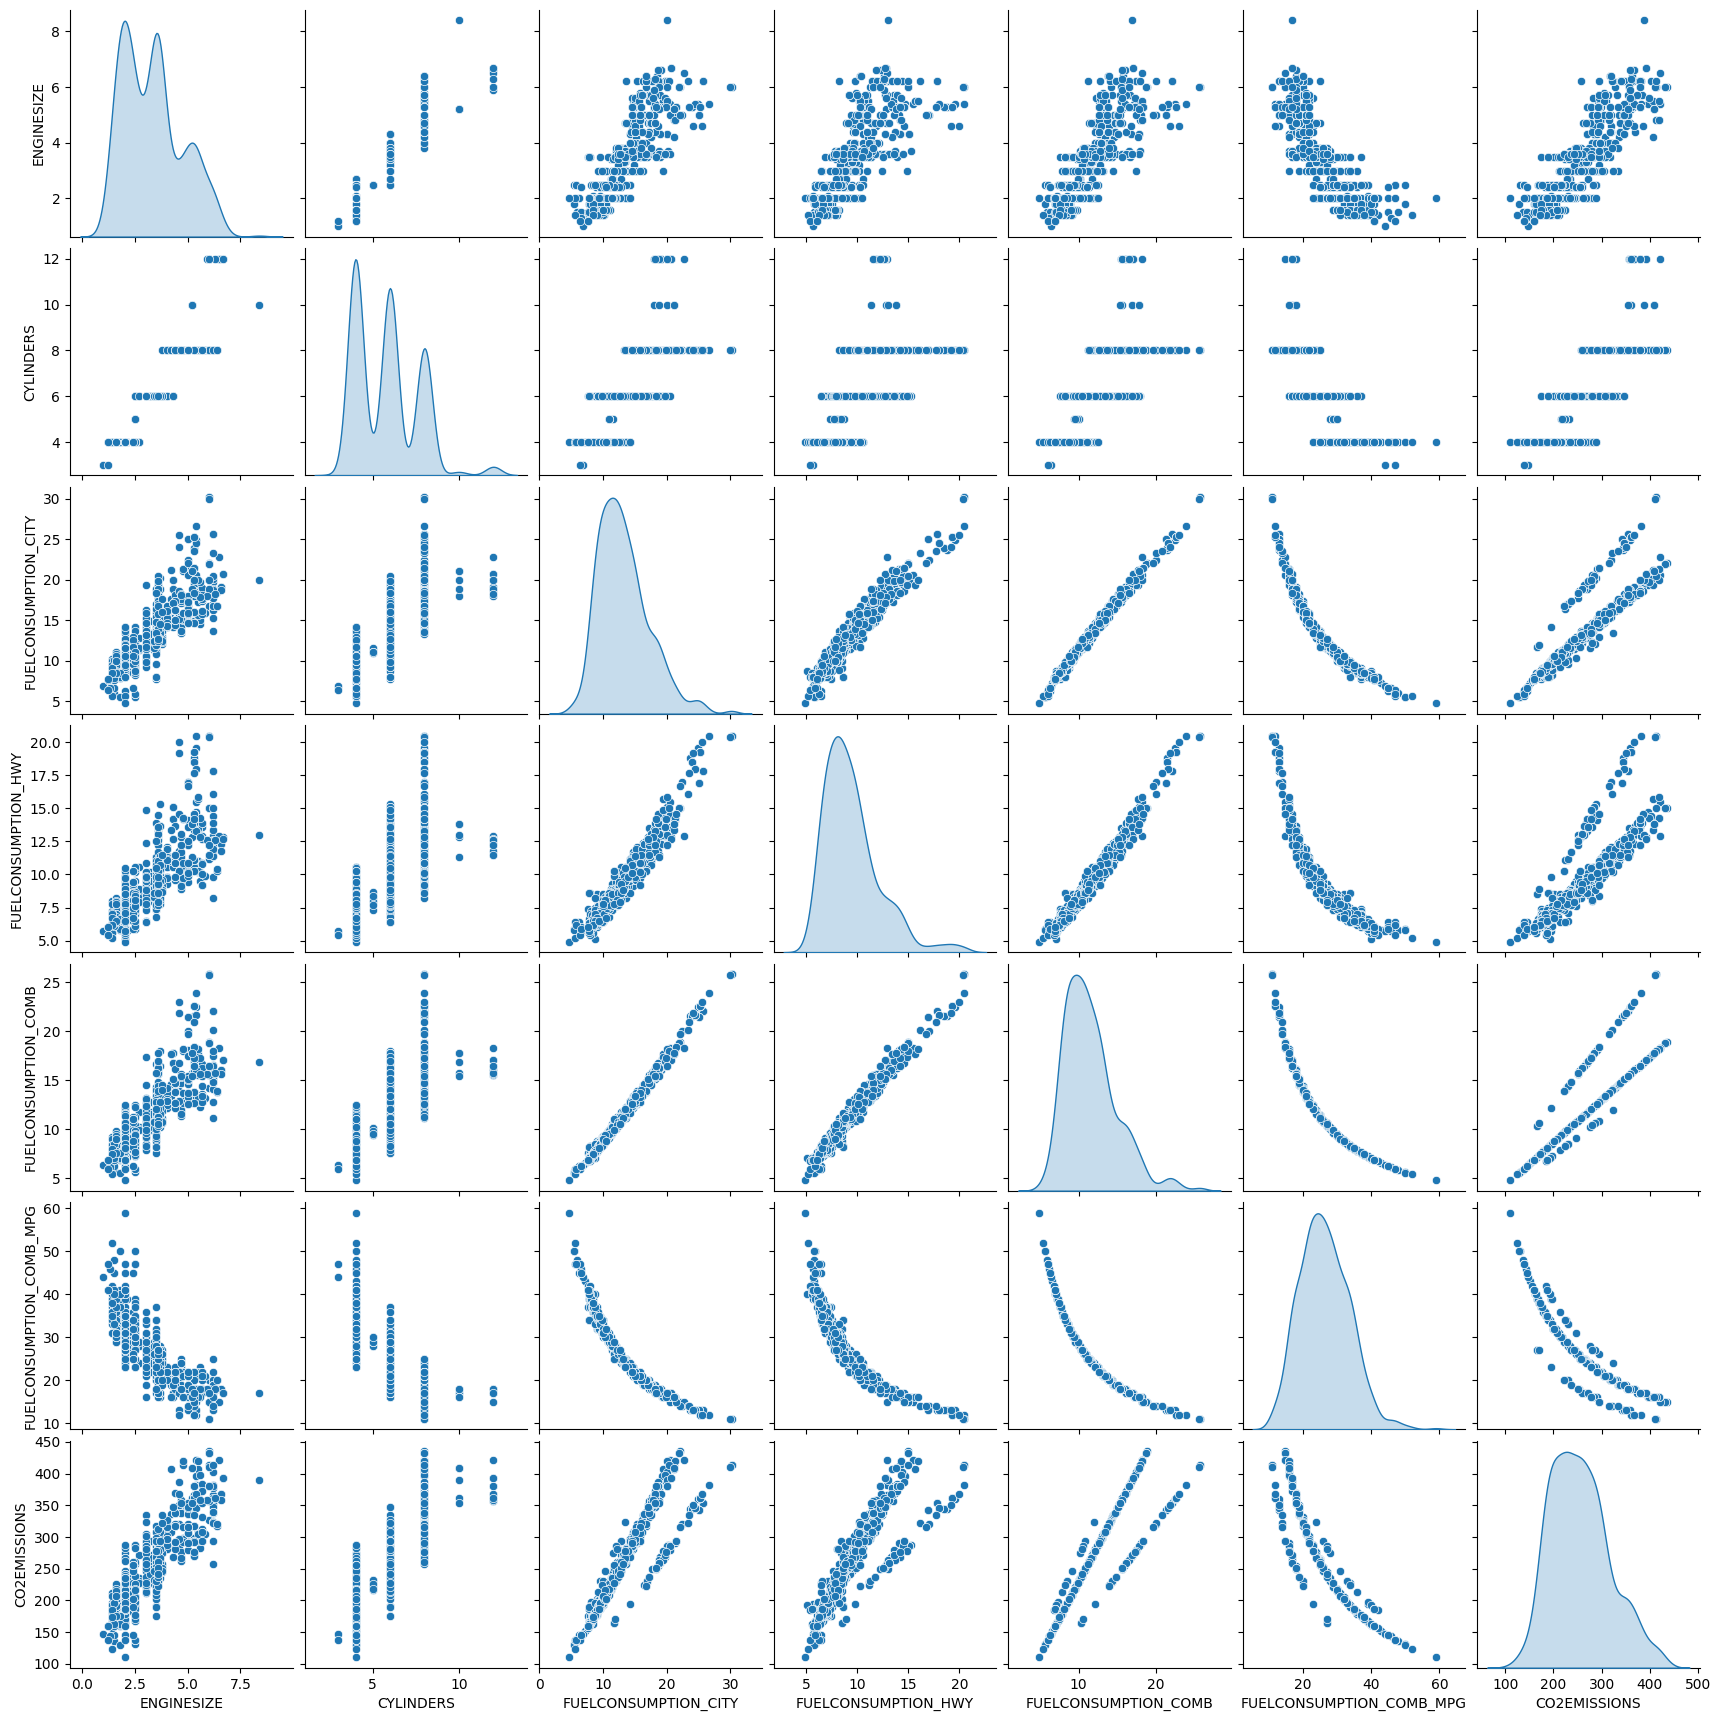

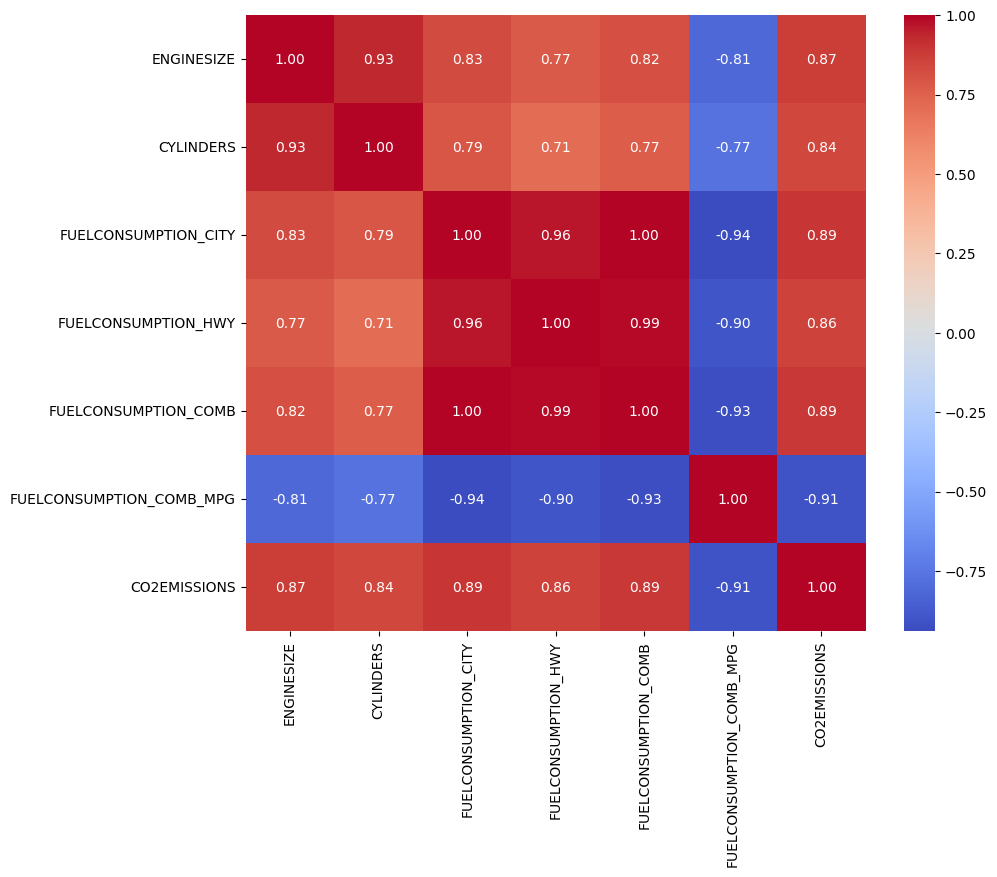

In [138]:
# 5. Gráficos de dispersão e correlações
sns.pairplot(train, diag_kind='kde')
plt.show()

# Matriz de correlação
corr_matrix = train.drop(labels=['FUELTYPE'], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [139]:
# 6. Combinações de preditores
train['ENGINESIZE_CYLINDERS'] = train['ENGINESIZE'] * train['CYLINDERS']
train['FUELCONSUMPTION_TOTAL'] = train['FUELCONSUMPTION_CITY'] + train['FUELCONSUMPTION_HWY']
train['FUELCONSUMPTION_RATIO'] = train['FUELCONSUMPTION_CITY'] / (train['FUELCONSUMPTION_HWY'] + 1e-9)  # Para evitar divisão por zero
train

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,ENGINESIZE_CYLINDERS,FUELCONSUMPTION_TOTAL,FUELCONSUMPTION_RATIO
372,3.5,6,X,15.9,11.3,13.8,20,317,21.0,27.2,1.407080
667,3.5,6,Z,12.1,8.7,10.6,27,244,21.0,20.8,1.390805
2,1.5,4,Z,6.0,5.8,5.9,48,136,6.0,11.8,1.034483
1011,3.5,6,X,12.9,9.4,11.3,25,260,21.0,22.3,1.372340
384,3.7,6,E,20.2,15.3,18.0,16,288,22.2,35.5,1.320261
...,...,...,...,...,...,...,...,...,...,...,...
991,2.5,4,X,10.4,8.1,9.4,30,216,10.0,18.5,1.283951
190,3.6,6,X,12.7,7.9,10.5,27,242,21.6,20.6,1.607595
668,5.0,8,Z,14.6,10.1,12.6,22,290,40.0,24.7,1.445545
808,1.6,4,Z,10.0,7.8,9.0,31,207,6.4,17.8,1.282051


In [149]:
# 7. Separar preditores e target
X_train = train.drop(columns=['CO2EMISSIONS'])
y_train = train['CO2EMISSIONS']

X_test = test.drop(columns=['CO2EMISSIONS'])
y_test = test['CO2EMISSIONS']

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
829,2.0,4,X,9.6,7.6,8.7,32
949,2.5,4,Z,12.6,9.5,11.2,25
175,6.2,8,Z,19.7,12.9,16.6,17
173,6.2,8,Z,19.7,12.9,16.6,17
776,5.5,8,Z,12.3,8.7,10.7,26
...,...,...,...,...,...,...,...
686,5.4,8,X,18.2,13.3,16.0,18
195,6.2,8,Z,14.9,8.5,12.0,24
366,3.5,6,E,18.3,12.9,15.9,18
982,2.7,4,X,11.7,8.6,10.3,27


In [151]:
# 8. Verificar dados ausentes
X_train = X_train.drop(labels=['ENGINESIZE_CYLINDERS', 'FUELCONSUMPTION_TOTAL', 'FUELCONSUMPTION_RATIO'], axis=1)
numeric_cols = X_train.select_dtypes(include=np.number).columns
categorical_cols = X_train.select_dtypes(include='object').columns

X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].mean())
X_test[numeric_cols] = X_test[numeric_cols].fillna(X_test[numeric_cols].mean())

In [157]:
label_encoder = LabelEncoder()
X_train['FUELTYPE'] = label_encoder.fit_transform(X_train['FUELTYPE'])
X_test['FUELTYPE'] = label_encoder.transform(X_test['FUELTYPE'])

In [158]:
# 10. Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [159]:
# 11. Treinar modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'RMSE Regressão Linear: {rmse_linear}')

RMSE Regressão Linear: 22.279069091383104


In [160]:
# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_forest = random_forest_model.predict(X_test_scaled)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
print(f'RMSE Random Forest: {rmse_forest}')

RMSE Random Forest: 7.64937895901314


In [161]:
print("Avaliação final: ")
print(f'RMSE Regressão Linear: {rmse_linear}')
print(f'RMSE Random Forest: {rmse_forest}')

Avaliação final: 
RMSE Regressão Linear: 22.279069091383104
RMSE Random Forest: 7.64937895901314
